#Plot xG and xPts for liverpool and man city to show how liverpool have over achieved while city have performed in line

In [ ]:
!pip install understat
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

import asyncio
import json
import aiohttp
from understat import Understat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
async def get_table(year):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        table = await understat.get_league_table("EPL", year)
        # print(table)
        return table

loop = asyncio.get_event_loop()
table = loop.run_until_complete(get_table("2019"))

In [ ]:
seasons = ["2014","2015","2016","2017","2018","2019","2020"]
columns = ['Liverpool Pts', 'Liverpool xPts','Liverpool GF', 'Liverpool xG','City Pts', 'City xPts','City GF', 'City xG']
df = pd.DataFrame(index=seasons, columns = columns)

for season in seasons:
  table = loop.run_until_complete(get_table(season))
  for row in table:
    if row[0] == 'Liverpool':
      df.at[season, columns[0]]= row[7]
      df.at[season, columns[1]]= row[13]
      df.at[season, columns[2]]= row[5]
      df.at[season, columns[3]]=row[8]
    if row[0] == 'Manchester City':
      df.at[season, columns[4]]= row[7]
      df.at[season, columns[5]]= row[13]
      df.at[season, columns[6]]= row[5]
      df.at[season, columns[7]]=row[8]

In [ ]:
df


,Liverpool Pts,Liverpool xPts,Liverpool GF,Liverpool xG,City Pts,City xPts,City GF,City xG
2014,62,61.17,52,51.7,79,73.1,83,75.82
2015,60,63.29,63,54.37,66,70.14,71,66.2
2016,76,69.83,78,66.63,78,85.41,80,79.85
2017,75,79.38,84,77.49,100,91.09,106,91.43
2018,97,83.45,89,79.46,98,90.64,95,93.72
2019,99,74.28,85,75.19,81,86.76,102,102.21
2020,40,42.99,45,44.61,53,53.24,46,48.46


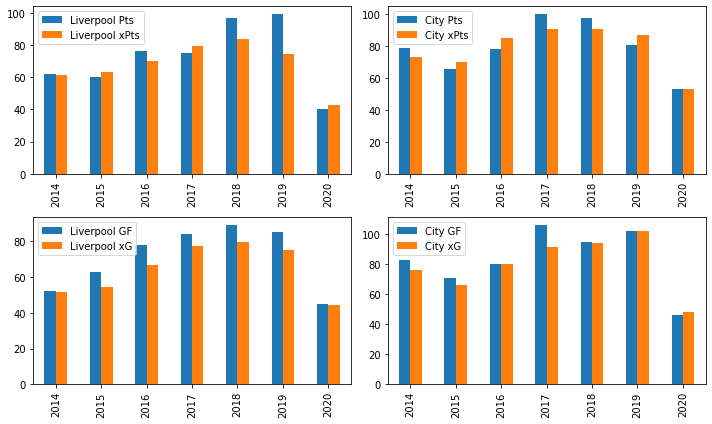

In [ ]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,tight_layout = True,figsize = (10,6))

df.plot(y=columns[:2],kind = 'bar',ax = ax1)
df.plot(y=columns[2:4],kind = 'bar',ax = ax3)

df.plot(y=columns[4:6],kind = 'bar',ax = ax2)
df.plot(y=columns[6:8],kind = 'bar',ax = ax4)
plt.show()